In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('Housing.csv')

In [4]:
data.shape

(545, 13)

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df = data.copy()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Converting the string columns to numerics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [24]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


#### Checking for null values in the dataset

In [23]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [9]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [11]:
x = df.drop(['price'], axis = 1)
y = df.price

#### Splitting the data to train and test

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                       test_size = 0.3,
                                                       random_state = 42)

#### Linear model

In [14]:
from sklearn.linear_model import LinearRegression

lir = LinearRegression()

lir.fit(x_train, y_train)

LinearRegression()

In [15]:
print('R-sq value:', round(lir.score(x_train, y_train), 2))

R-sq value: 0.69


In [21]:
predictions = np.round(lir.predict(x_test), 2)

In [27]:
lir_pred = pd.DataFrame(np.c_[y_test, predictions],
                        columns = ['Actual', 'Predicted'])

In [28]:
lir_pred

,Actual,Predicted
0,4060000.0,5407508.87
1,6650000.0,7097185.47
2,3710000.0,3055462.44
3,6440000.0,4476945.20
4,2800000.0,3315983.66
...,...,...
159,3500000.0,3796902.65
160,3360000.0,4130262.36
161,4970000.0,7058248.99
162,3150000.0,5417344.25


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn import metrics
print('R-sq value is:', np.round(metrics.r2_score(y_test, predictions), 2))
print('Mean Absolute percentage error is:', np.round(metrics.mean_absolute_percentage_error(y_test, predictions), 2))

R-sq value is: 0.64
Mean Absolute percentage error is: 0.21


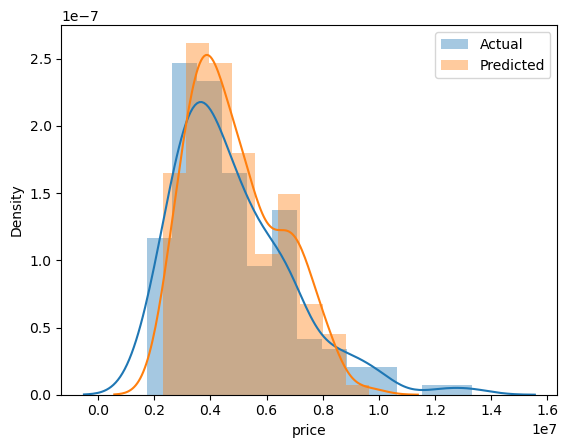

In [54]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(predictions, label = 'Predicted')
plt.legend()
plt.show()

#### Decision tree model

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [38]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
dtc_predicitions = np.round(dtc.predict(x_test), 2)

In [41]:
dtc_pred = pd.DataFrame(np.c_[y_test, dtc_predicitions],
                        columns = ['Actual', 'Predicted'])
dtc_pred

,Actual,Predicted
0,4060000,3990000
1,6650000,6293000
2,3710000,3850000
3,6440000,4935000
4,2800000,3990000
...,...,...
159,3500000,3710000
160,3360000,4620000
161,4970000,3570000
162,3150000,8400000


In [42]:
print('R-Sq value:', np.round(metrics.r2_score(y_test, dtc_predicitions), 2))
print('Mean absolute percentage error:', np.round(metrics.mean_absolute_percentage_error(y_test, dtc_predicitions), 2))

R-Sq value: 0.17
Mean absolute percentage error: 0.32


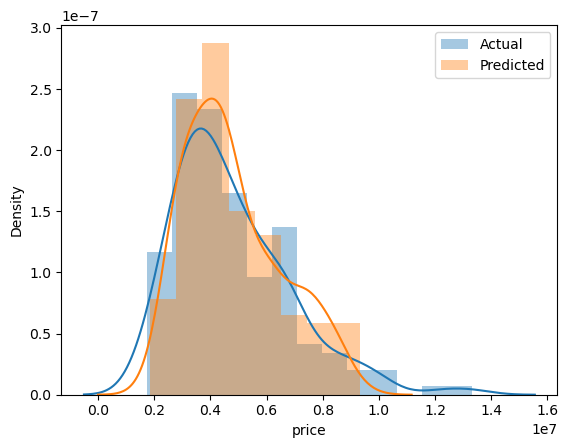

In [55]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(dtc_predicitions, label = 'Predicted')
plt.legend()
plt.show()

#### Random forest model

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 30)

In [46]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30)

In [48]:
rfc_predictions = np.round(rfc.predict(x_test), 2)

In [49]:
rfc_pred = pd.DataFrame(np.c_[y_test, rfc_predictions],
                        columns = ['Actual', 'Predicted'])
rfc_pred

,Actual,Predicted
0,4060000,3990000
1,6650000,7840000
2,3710000,3850000
3,6440000,4935000
4,2800000,3990000
...,...,...
159,3500000,2730000
160,3360000,3150000
161,4970000,3570000
162,3150000,3773000


In [51]:
print('R-sq value:', np.round(metrics.r2_score(y_test, rfc_predictions), 2))
print('Mean absolute percentage error:', np.round(metrics.mean_absolute_percentage_error(y_test, rfc_predictions), 2))

R-sq value: 0.42
Mean absolute percentage error: 0.24


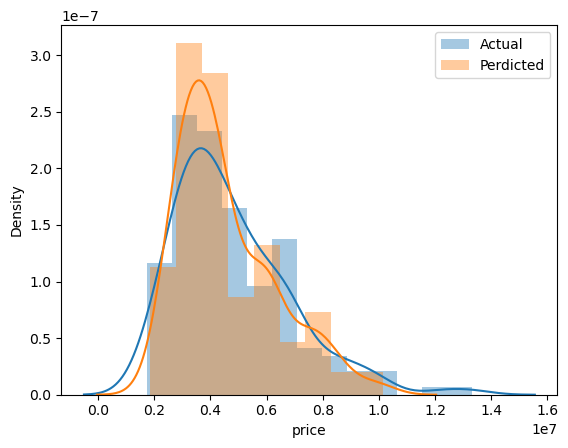

In [56]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(rfc_predictions, label = 'Perdicted')
plt.legend()
plt.show()

**Compared to Random forest and Decision tree, Linear model is giving the best results**